In [ ]:
# Stable Diffusion 설치
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.5 M

In [ ]:
# 메모리 삭제
# torch.cuda.empty_cache()

In [ ]:
!pip install -qq diffusers==0.31

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.1 MB/s eta 0:00:00


윤곽선 코드

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import torch

# ControlNet 모델 로드
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)

# 파이프라인 정의
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

# 스케줄러 설정
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)

# CUDA에 올리기
canny_pipe = canny_pipe.to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
import numpy as np
import cv2
from diffusers.utils import load_image

# 1. 원본 이미지 불러오기 (웹에서 불러오는 예시)
image = load_image("https://lh3.googleusercontent.com/gps-cs-s/AB5caB-kZQK-B3B8P0hVQL2dOooZ8fWfPZVsk0ve20miA_MKIyKa9eFIHeutx3O8sf67NnyAM7FDRzJE28O0XGQsOOSZjMbFOFHS5iIJu09gjcgj1LW7_uFpfxKdbDSaNgjB1k4DF5AnVw=s1360-w1360-h1020")

# 2. NumPy 배열로 변환 후 Canny edge 적용
image_np = np.array(image)
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# 3. 다시 PIL 이미지로 변환 (ControlNet은 RGB 이미지 필요)
canny_image = Image.fromarray(edges).convert("RGB")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unnamed.jpg to unnamed.jpg


In [ ]:
from PIL import Image
from google.colab import files

# 1. 이미지 열기
image = Image.open("/content/unnamed.jpg")

# 2. 이미지 확인 (Colab에서 직접 보여줌)
image

# 3. 이미지 저장 (새 이름으로 저장해도 되고, 그대로 저장해도 돼)
save_path = "/content/blue.jpg"
image.save(save_path)

# 4. 이미지 다운로드
files.download(save_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/20 [00:00<?, ?it/s]

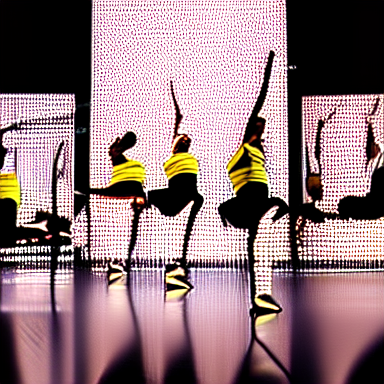

In [ ]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

# 동일한 이미지를 생성하기 위해 seed를 지정합니다.
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
canny_image = canny_pipe(
    prompt="five contemporary dancers perform together on a stage with a soft blue background",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

# 생성된 이미지를 저장합니다.
canny_image.save("/content/blue.jpg")

# 생성된 이미지를 출력합니다.
canny_image

  0%|          | 0/30 [00:00<?, ?it/s]

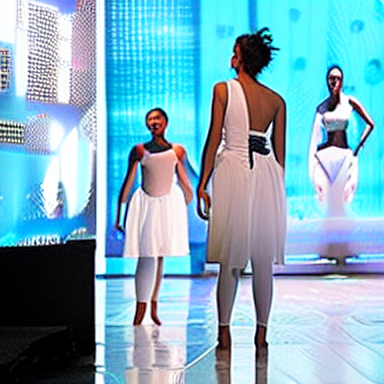

In [ ]:
prompt = "five contemporary dancers perform together on a stage with a soft blue background"
negative_prompt = "blurry, low resolution, distorted"

result = canny_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=canny_image,
    num_inference_steps=30,
    guidance_scale=8.5,
    controlnet_conditioning_scale=0.8,
    generator=torch.manual_seed(123)  # seed도 변경
).images[0]

result.save("/content/blue.jpg")
result


인체 자세 감지

In [ ]:
# controlnet-aux를 설치합니다. Human pose를 검출해주는 controlnet의 보조용 모델입니다.
!pip install controlnet-aux==0.0.1

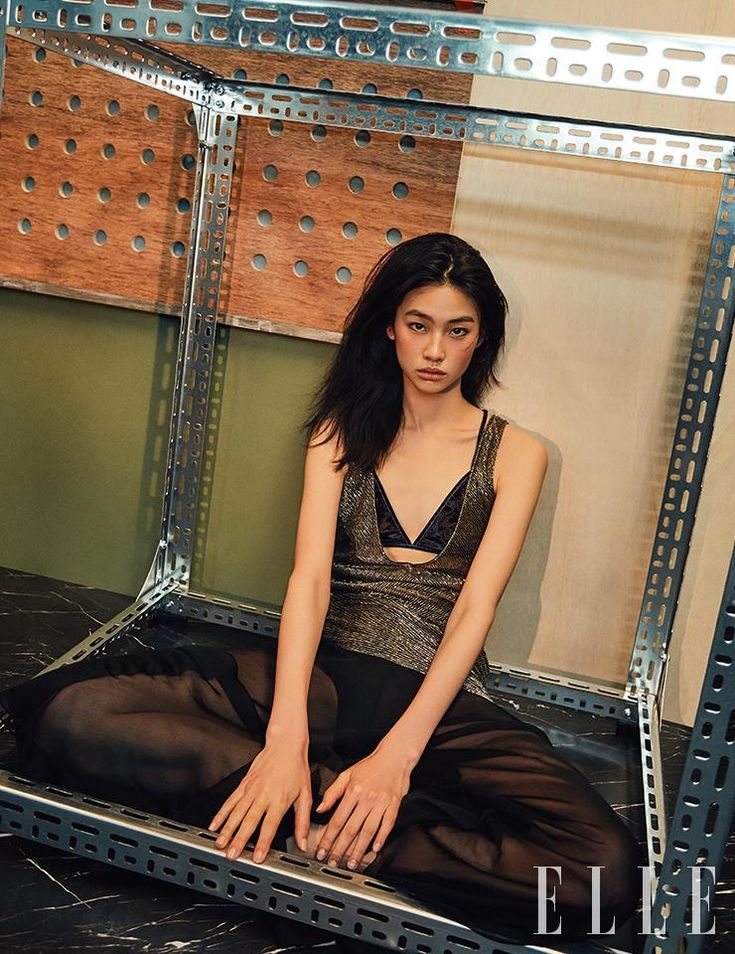

In [ ]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://i.pinimg.com/736x/32/85/4b/32854b1be36f6a451c3994b4354793dd.jpg"
)
openpose_image

body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

cuda


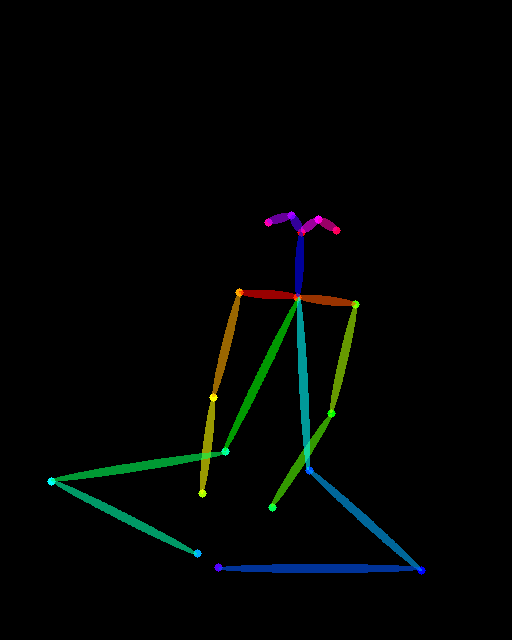

In [ ]:
from controlnet_aux import OpenposeDetector

# 인체의 자세를 검출하는 사전 학습된 ControlNet 불러오기
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 이미지에서 자세 검출
openpose_image = openpose(openpose_image)
openpose_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ho.jpg to ho.jpg


In [ ]:
from PIL import Image
from google.colab import files

# 1. 이미지 열기
image = Image.open("/content/ho.jpg")

# 2. 이미지 확인 (Colab에서 직접 보여줌)
image

# 3. 이미지 저장 (새 이름으로 저장해도 되고, 그대로 저장해도 돼)
save_path = "/content/hoho.jpg"
image.save(save_path)

# 4. 이미지 다운로드
files.download(save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 🔧 필요한 라이브러리 임포트
import torch
from PIL import Image
from google.colab import files
from diffusers import UniPCMultistepScheduler

# 1. 파이프라인 셋업
openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

# 2. seed 설정
generator = torch.manual_seed(0)

# 3. 프롬프트 작성
prompt = "A girl sitting cross-legged and stretching out her arms, expressive oil painting style"
negative_prompt = "digital art style, pixelated, unrealistic colors, washed out, distorted perspective, bad composition"

# 4. 로컬 이미지 열기
image_path = "/content/ho.jpg"  # 업로드한 이미지 경로
openpose_image = Image.open(image_path).convert("RGB")

# 5. 이미지 생성
result = openpose_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=openpose_image,
    num_inference_steps=30,
    guidance_scale=8.0,
    generator=generator
).images[0]


  0%|          | 0/30 [00:00<?, ?it/s]

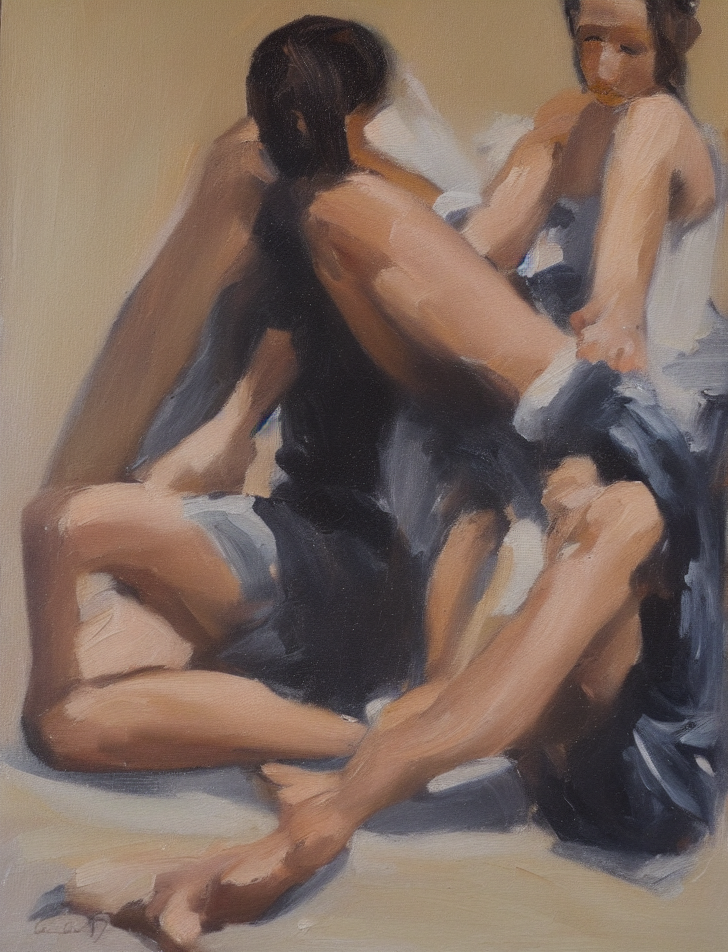

In [ ]:
from IPython.display import display

display(result)


윤곽선 검출 + 인체 자세 감지

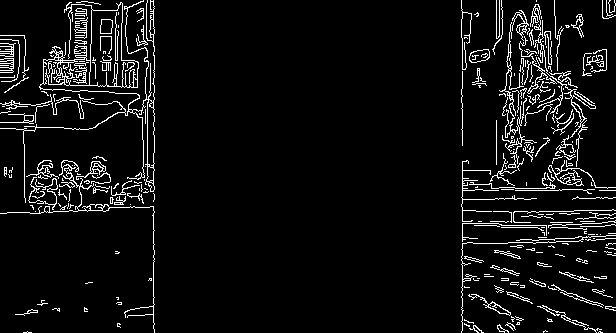

In [ ]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np

# 이미지를 불러오세요.
image = load_image("https://www.chosun.com/resizer/v2/KMCIBHSYJWN3LAXUTQHJBDRHYM.jpg?auth=fb093e601f65c2a78e2d700487212738595369b98324f0454f68de1c7ce4d0ff&width=616")

# OpenCV는 NumPy 배열을 사용하므로 이미지 복사본을 만든다
canny_image = image.copy()

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 이미지를 NumPy 배열로 변환합니다.
canny_image = np.array(canny_image)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다. (중앙 부분을 0으로 설정)
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출합니다 (grayscale로 변환 → Canny 적용)
gray = cv2.cvtColor(canny_image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, low_threshold, high_threshold)

# 윤곽선 이미지를 RGB로 변환합니다 (ControlNet은 RGB 이미지 필요)
canny_image = Image.fromarray(edges)
canny_image = canny_image.convert("RGB")  # 이 줄은 ControlNet 호환을 위해 필요
canny_image


cuda


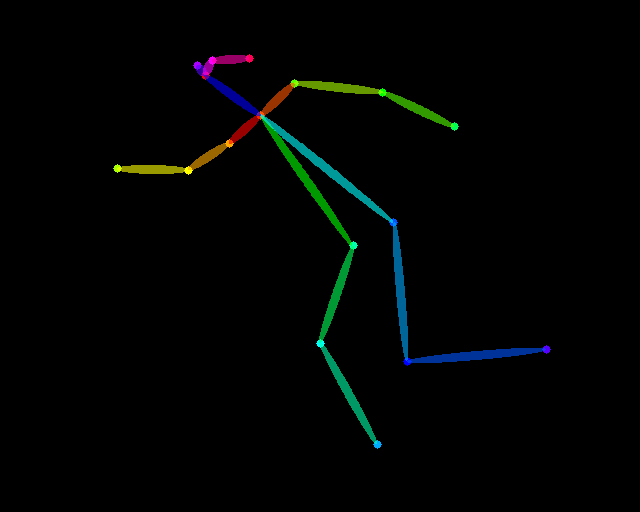

In [ ]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

# 이미지를 불러옵니다. (사람의 전신이 보이는 이미지면 좋아요)
openpose_image = load_image(
    "https://thumbnews.nateimg.co.kr/view610///onimg.nate.com/orgImg/my/2017/12/01/201712011845215842_1.jpg"
)

# OpenposeDetector를 불러옵니다
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

# 인체 자세를 검출합니다
openpose_image = openpose(openpose_image)

# 결과 확인
openpose_image


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# 이미지 크기를 맞추자 (같은 해상도 필수)
resize_size = (384, 384)
openpose_image = openpose_image.resize(resize_size)
canny_image = canny_image.resize(resize_size)


In [ ]:
import torch
torch.cuda.empty_cache()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

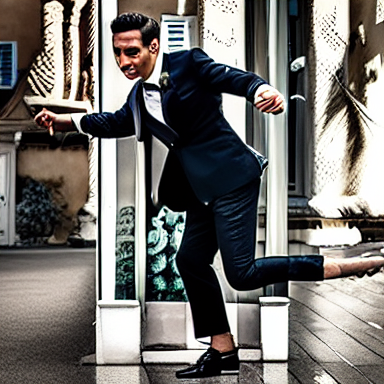

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

# 1. 두 개의 전처리기 모델 (Canny + OpenPose)을 리스트로 만듭니다
controlnets = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
]

# 2. 리스트 controlnets를 파이프라인에 전달합니다
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets,
    torch_dtype=torch.float16
)

# 3. 스케줄러 세팅
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 4. 프롬프트 작성
prompt = "a man with fun pose lift one leg and background is italy"
negative_prompt = "blurry, low resolution, distorted, bad anatomy, pixelated"

# 5. seed 지정
generator = torch.manual_seed(42)

# 6. 전처리된 이미지 2장 (OpenPose + Canny)
images = [openpose_image, canny_image]

# 7. 이미지 생성
result = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=images,
    num_inference_steps=30,
    guidance_scale=8.5,
    generator=generator
).images[0]

# 8. 저장 및 출력
result.save("/content/pose.jpg")
result
